In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy.signal import savgol_filter
from matplotlib.pyplot import figure
import seaborn as sns
import math 
%matpscipy.signal.residuez

UsageError: Line magic function `%matpscipy.signal.residuez` not found.


## Load data

In [2]:
data = pd.read_csv("../Data/test.txt") 
data.head()

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
0,-11,11,-20,-8,29,1,9,-21,-1,-37,...,38,64,-61,-33,-4,-19,-3,-30,-14,0
1,18,-23,2,-15,2,20,10,-31,-15,-15,...,-53,51,-42,40,3,92,-45,-40,24,0
2,2,-6,3,3,5,-14,10,-16,-6,-4,...,-6,-76,-41,-22,-12,17,15,62,-4,0
3,3,2,-9,4,6,-26,5,6,-6,14,...,-67,7,-11,15,41,-9,7,6,-1,0
4,1,-22,-15,9,-5,13,-5,-15,4,2,...,-7,127,-39,-24,116,-48,62,21,95,0


In [3]:
dataList = data.iloc[0]

## Choosing filter

In [4]:
dataList = abs(dataList[:100])

In [5]:
dataList.shape[0]


100

In [6]:
filteringData1 = savgol_filter(dataList,5,2)
filteringData2 = savgol_filter(dataList,7,2)
filteringData3 = savgol_filter(dataList,9,2)
filteringData4 = savgol_filter(dataList,11,2)

In [7]:
filteringData1.shape

(100,)

(-4.95, 103.95, -6.3500000000000005, 133.35)

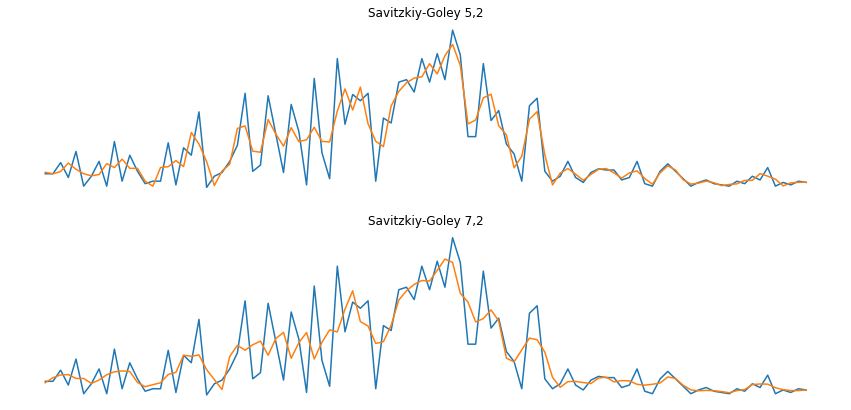

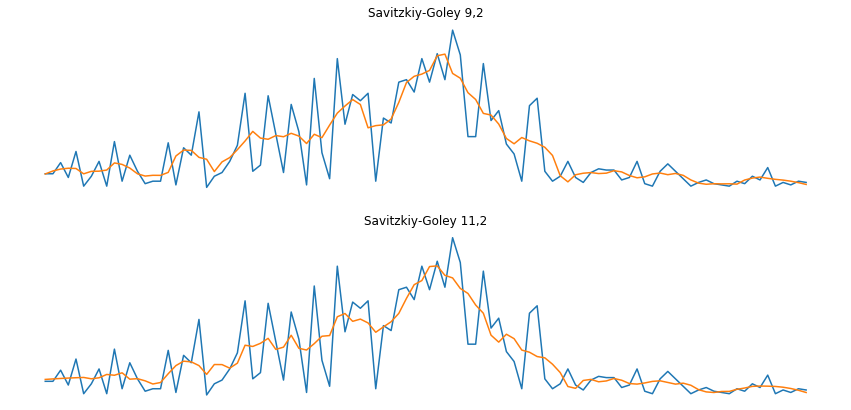

In [8]:
figure(figsize=(15, 7))

plt.subplot(2,1,1)
plt.plot(dataList)
plt.plot(filteringData1)
plt.title("Savitzkiy-Goley 5,2")
plt.axis('off')
plt.subplot(2,1,2)
plt.plot(dataList)
plt.plot(filteringData2)
plt.title("Savitzkiy-Goley 7,2")
plt.axis('off')

figure(figsize=(15, 7))

plt.subplot(2,1,1)
plt.plot(dataList)
plt.plot(filteringData3)
plt.title("Savitzkiy-Goley 9,2")
plt.axis('off')
plt.subplot(2,1,2)
plt.plot(dataList)
plt.plot(filteringData4)
plt.title("Savitzkiy-Goley 11,2")
plt.axis('off')



In [9]:
def sigmaValue(inp):
    length = inp.shape[0]
    sigma = 0
    for i in inp:
        sigma += i*i
    sigma /= length
    sigma = math.sqrt(sigma)
    return sigma

In [10]:
def meanValue(inp):
    mean = 0
    length = inp.shape[0]
    for i in inp:
        mean += i
    mean /= length
    return mean

In [11]:
def standartization(inp):
    mean = meanValue(inp)
    sigma = sigmaValue(inp)
    length = inp.shape[0]
    output = np.zeros(length)
    for i in range(length):
        output[i] = (inp[i] - mean)/sigma
    return output

In [13]:
def movingAverageFilter(inp,n):
    inp = abs(inp)
    length = inp.shape[0]
    output = np.zeros(length)
    for i in range(length):
        current = 0
        for j in range(n):
            ind = int(i-(n-1)/2+j)
            if ((ind>-1) and (ind<length)):
                 current += inp[ind]/n
        output[i] = current
    return output

In [15]:
maf3 = movingAverageFilter(dataList,3)
maf5 = movingAverageFilter(dataList,5)
maf7 = movingAverageFilter(dataList,7)

(-4.95, 103.95, -3.1477855477855794, 109.33426573426605)

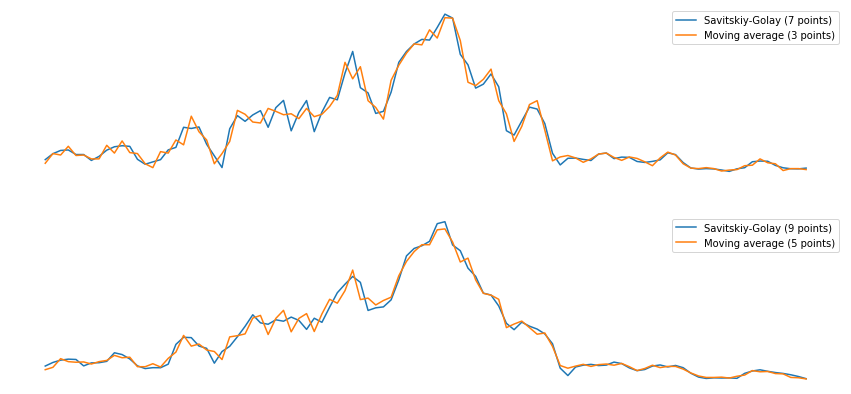

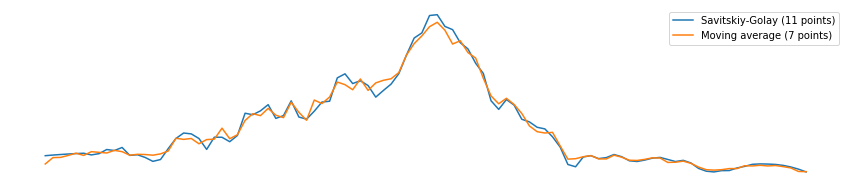

In [20]:
figure(figsize=(15, 7))

plt.subplot(2,1,1)
plt.plot(filteringData2,label='Savitskiy-Golay (7 points)')
plt.plot(maf3,label='Moving average (3 points)')
plt.legend()
plt.axis('off')
plt.subplot(2,1,2)
plt.plot(filteringData3,label='Savitskiy-Golay (9 points)')
plt.plot(maf5,label='Moving average (5 points)')
plt.legend()
plt.axis('off')

figure(figsize=(15, 7))

plt.subplot(2,1,1)
plt.plot(filteringData4,label='Savitskiy-Golay (11 points)')
plt.plot(maf7,label='Moving average (7 points)')
plt.legend()
plt.axis('off')


In [23]:
data1 = data.iloc[43]
data2 = data.iloc[24]
data3 = data.iloc[78]

In [31]:
filtered1 = movingAverageFilter(data1,5)
filtered2 = movingAverageFilter(data2,5)
filtered3 = movingAverageFilter(data3,5)
st = standartization(filtered1)

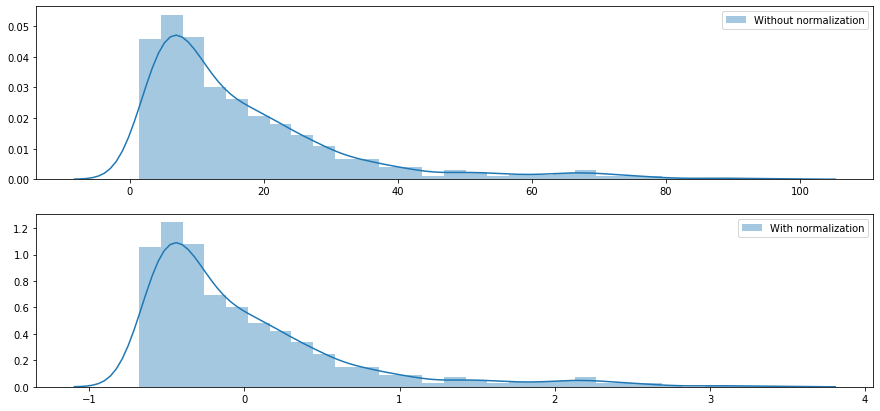

In [42]:
figure(figsize=(15, 7))

plt.subplot(2,1,1)
sns.distplot(filtered1,label = 'Without normalization');
plt.legend()
plt.subplot(2,1,2)
sns.distplot(st,label = 'With normalization');
plt.legend()


In [68]:
std1 = standartization(filtered1)
std2 = standartization(filtered2)
std3 = standartization(filtered3)

(-40.0, 840.0, -0.9405195033872648, 3.5970740806746426)

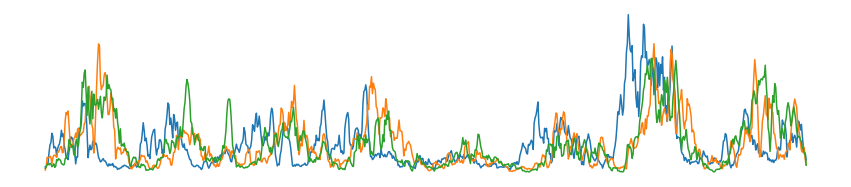

In [69]:
figure(figsize=(15, 7))

plt.subplot(2,1,1)
plt.plot(std1)
plt.plot(std2)
plt.plot(std3)
plt.axis('off')